In [3]:
from Models import word2vector as w2v
##初始化
import json
from gensim.models import Word2Vec
from gensim.models import FastText
import jieba
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import re
import random
from tqdm import tqdm
import time
import os
from sklearn.manifold import TSNE

In [4]:
data=w2v.read_json('baike_qa_train.json','answer')

截取数据进行简单训练

In [ ]:
def cut_words(train_data):
    seg_data = list()
    for i in train_data:
        new_text = "".join(re.findall('[\u4e00-\u9fa5]+', i, re.S))# 去除一些无用的字符只提取出中文出来
        seg_i = jieba.lcut(new_text)
        seg_data.append(seg_i)
    return seg_data
train_data = [i['answer'] for i in data[:1000]]
train_data = cut_words(train_data)
#------------------截取一部分数据进行训练-----------------------
model = Word2Vec(sentences=train_data, vector_size=100, window=10, min_count=10, workers=8,epochs = 10)
model.save('Models/word2vec_epochs=10_windows=10.model')
model=Word2Vec.load('Models/word2vec_epochs=10_windows=10.model'
                    
model.wv.similarity('长', '短') # 计算两个词的余弦相似度     
model.wv.most_similar('中国') # 取出与“中国”最相似的10个词
Model.wv.most_similar('中国')
model.wv.most_similar(positive=["上海", "中国"], negative=["纽约"]) # 获得 上海-中国+纽约 的词

以下都是在Model class中训练，包括随机抽取和多批次进行训练

In [ ]:
#按照skip-gram的模型进行分批次训练迭代
paras = {'vector_size':100, 'window':5, 'min_count':2, 'workers':8, 'sg':1,  'epochs':10}
y=w2v.Model(model_name="word2vec", args=paras, model_path = "Models/turns_word2vec.model")
# y.epoches_samples_trainmodel(data,14251, 100)
y.prove_model()

In [6]:
#按照CBOW的模型进行分批次训练迭代
paras = {'vector_size':100, 'window':5, 'min_count':2, 'workers':8, 'sg':0,  'epochs':10}
y=w2v.Model(model_name="word2vec", args=paras, model_path = "Models/turns_word2vec_sg=0.model")
# y.epoches_samples_trainmodel(data,14251, 100)
y.prove_model()

查看词向量大小: (8202, 100)
计算长-短的余弦相似度: 0.719043
取出与“中国”最相似的10个词 [('日本', 0.7903375029563904), ('台湾', 0.7701806426048279), ('美国', 0.7295264601707458), ('海外', 0.7279060482978821), ('印度', 0.7153326869010925), ('本土', 0.7114668488502502), ('中东', 0.6970187425613403), ('越南', 0.6968420147895813), ('北美', 0.6950423717498779), ('新加坡', 0.6937804222106934)]
语义类比测试Accuracy: 0.375
 获得 上海-中国+纽约 的词： [('天津', 0.6267380118370056), ('北京', 0.6116111278533936), ('浙江', 0.6034860014915466), ('广州', 0.5982304811477661), ('广东', 0.5968050956726074), ('湖南', 0.5834296345710754), ('重庆', 0.579742431640625), ('江苏', 0.5759354829788208), ('国内', 0.5755245089530945), ('珠海', 0.5726158618927002)]


In [ ]:
##按照skip-gram的模型进行随机抽取训练迭代
paras = {'vector_size':100, 'window':5, 'min_count':2, 'workers':8, 'sg':1,  'epochs':10}
y=w2v.Model(model_name="word2vec", args=paras, model_path = "Models/random_word2vec.model")
# y.random_samples_trainmodel(data ,14251, 100)#随机采样进行模型训练
y.prove_model()

In [3]:
##按照skip-gram的模型进行分批次训练迭代，并引入预训练模型
paras = {'vector_size':100, 'window':5, 'min_count':2, 'workers':8, 'sg':1,  'epochs':10}
y=w2v.Model(model_name="word2vec", args=paras, model_path = "FastText.model")
# y.epoches_samples_trainmodel(data,14251, 100)
y.prove_model()

查看词向量大小: (20095, 100)
计算长-短的余弦相似度: 0.72674334
取出与“中国”最相似的10个词 [('日本', 0.760459840297699), ('台湾', 0.7030314207077026), ('南韩', 0.6857806444168091), ('东亚', 0.662672758102417), ('我国', 0.6599275469779968), ('美国', 0.6587134599685669), ('印度', 0.6558370590209961), ('东北三省', 0.6524921655654907), ('西方', 0.6424261927604675), ('中国男足', 0.6413339376449585)]
语义类比测试Accuracy: 0.5
 获得 上海-中国+纽约 的词： [('广东', 0.5895499587059021), ('广州', 0.5723616480827332), ('广西', 0.561539888381958), ('天津', 0.5583580732345581), ('湖南', 0.5457238554954529), ('北京', 0.535956621170044), ('英才网', 0.5335414409637451), ('山东', 0.5278924107551575), ('中华', 0.5273842215538025), ('我国', 0.524954617023468)]


可视化处理

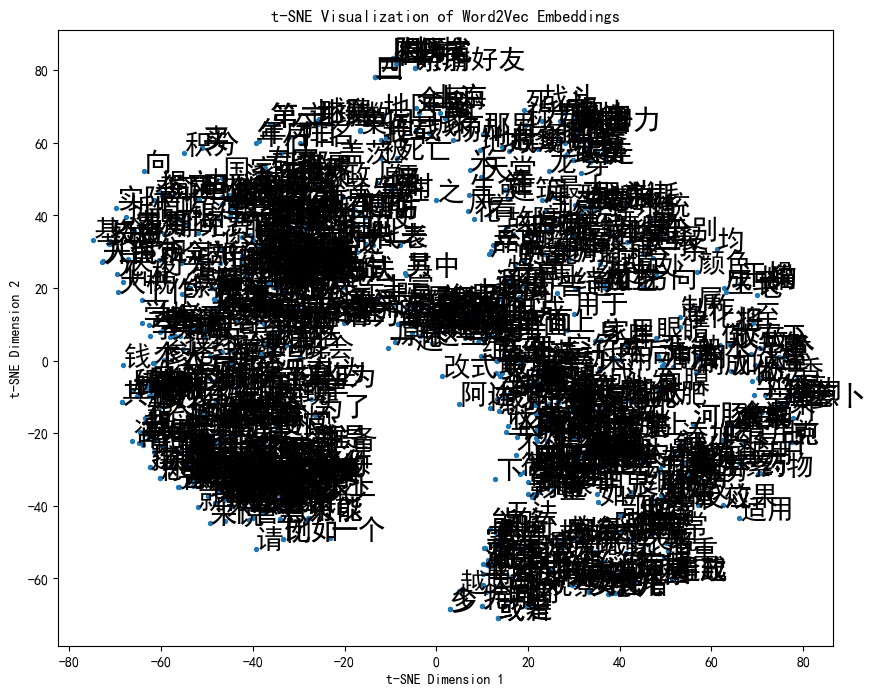

In [7]:
#可视化处理
v=w2v.versionism(model_name="word2vec",model_path = "Models/pre_train_word2vec.model",save_path = "Models/pre_train_word2vec_2d.npy")
# v.demosion_h22()
v.vector_2d_show()

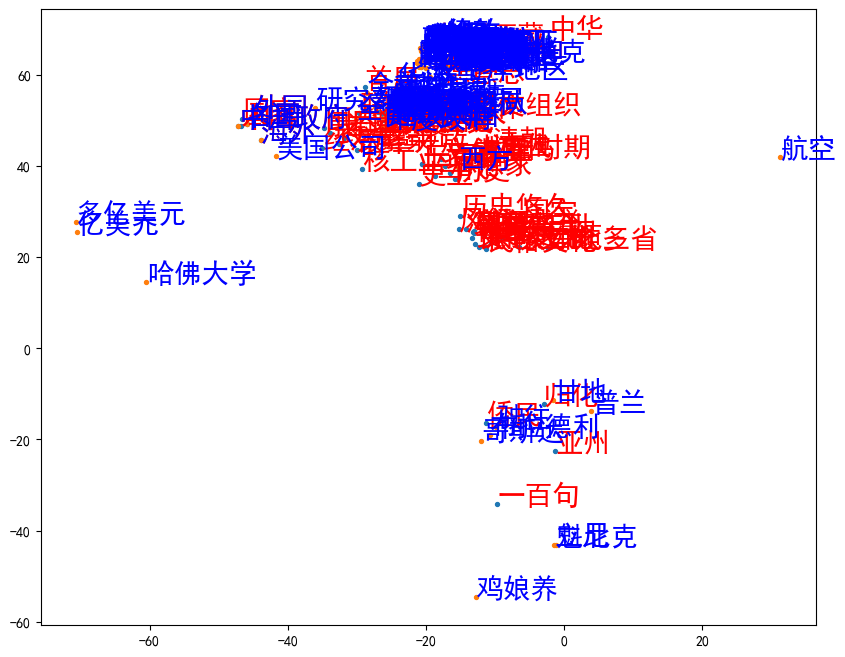

两个词的余弦相似度: 0.65871346


In [10]:
v.cpka("中国","美国")

K-means聚类分析

/home/smile/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


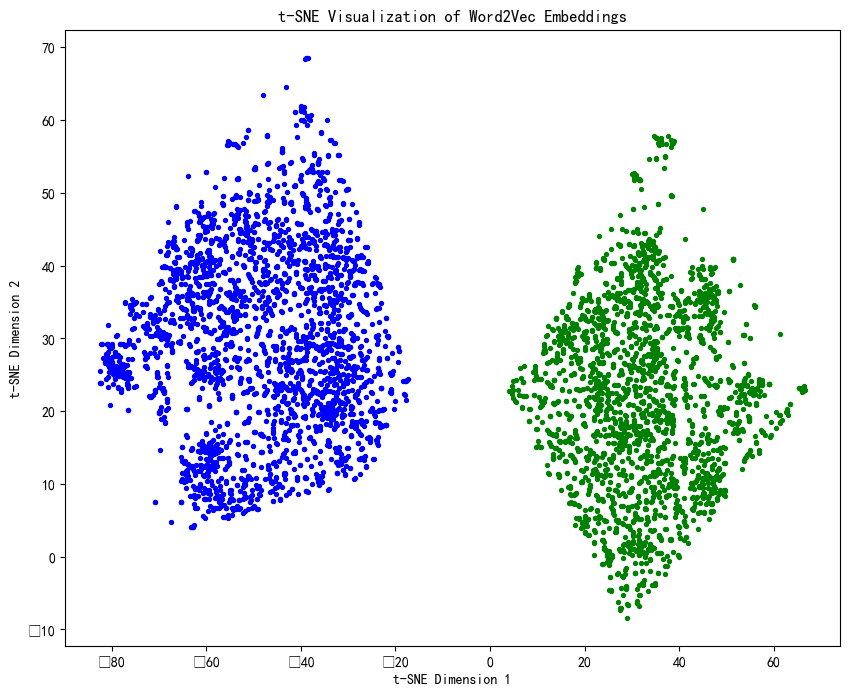

/home/smile/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


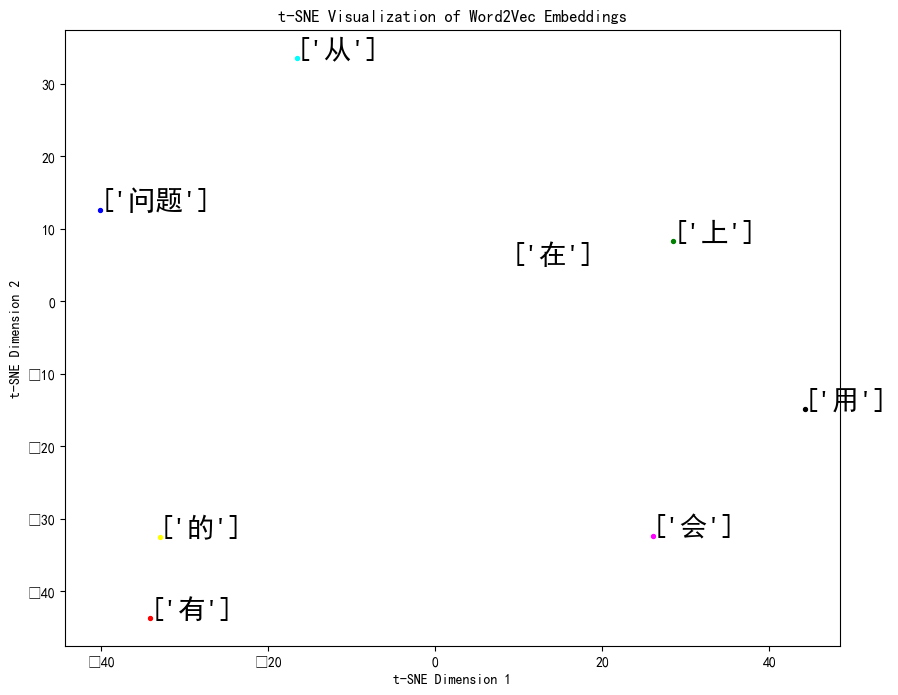

In [61]:
import numpy as np
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min

model = Word2Vec.load("Models/pre_train_word2vec.model")
# 获取模型中所有词语的词向量
words = list(model.wv.key_to_index)

vectors = np.load('Models/pre_train_word2vec_2d.npy')

#---------------聚类------------------------------
# 设置聚类数量
num_clusters = 8

# 使用KMeans算法进行聚类
kmeans = KMeans(n_clusters=num_clusters,n_init=10)
kmeans.fit(vectors)

#------------------可视化其中两类----------------------------------

# 获取每个词语所属的聚类标签
cluster_labels = kmeans.labels_

# 词语,对应的聚类标签,向量整合
word_cluster_map = list(zip(words,cluster_labels,vectors))

#分类每个聚类中的词语
cluster_words = [0]*num_clusters
for i in range(num_clusters):
    cluster_words[i] = [(word,vector) for word, label, vector in word_cluster_map if label == i]
    # print(f"Cluster {i}: {cluster_words[i]}")

color = ['blue','green','red','cyan','magenta','yellow','black','white']
plt.figure(figsize=(10, 8))
for j in range(2):
    for i in range(len(cluster_words[j])):
        plt.scatter(cluster_words[j][i][1][0], cluster_words[j][i][1][1], marker='o', s=8, color=color[j])

        # plt.annotate(cluster_words[0][i][0], xy=(cluster_words[0][i][1][0], cluster_words[0][i][1][1]), fontsize=20, color='red')

# 添加图标题和坐标轴标签
plt.title('t-SNE Visualization of Word2Vec Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
# 显示可视化图
plt.show()
 
#-----------------------------找到所有类中心点附近最近的词汇，并可视化--------------



centers=kmeans.cluster_centers_

# 计算每个样本到最近的簇中心点的距离以及索引
closest=[0]*num_clusters
for i in range(num_clusters):
    data = [vector for word, label, vector in word_cluster_map if label == i]
    data = np.array(data).reshape((-1,2))  
    center = centers[0].reshape((-1,2))
    clo_index, _ = pairwise_distances_argmin_min(data,center)
    closest[i] = data[clo_index[0]]


plt.figure(figsize=(10, 8))
for i in range(num_clusters):
        plt.scatter(closest[i][0],closest[i][1], marker='o', s=8, color=color[i])
        labels = [word for word, label, vector in word_cluster_map if (vector == closest[i]).all()]
        plt.annotate(labels, xy=(closest[i][0],closest[i][1]), fontsize=20)
# 添加图标题和坐标轴标签
plt.title('t-SNE Visualization of Word2Vec Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
# 显示可视化图
plt.show()
 